In [2]:
import pprint
from fastcore.basics import patch
import networkx as nx
# import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipycytoscape
from ipycytoscape import CytoscapeWidget
from IPython.display import display, clear_output, HTML
from ipywidgets import Output
from pprint import pformat
import pandas as pd
from ipydatagrid import DataGrid
from ipywidgets import Tab

In [3]:
## Creating Author Class
class Author:
    def __init__(self, first, middle, last, email=None, publications=[]):
        self.first = first
        self.middle = middle
        self.last = last
        self.email = email
        self.publications = publications

In [4]:
## Make format pretty
@patch
def __repr__(self: Author):
    return pprint.pformat(vars(self))

## Mock Dataset
a1 = Author('A', 'B', 'Carlson', publications=[1, 2, 3])
a2 = Author('B', 'C', 'Dawson', publications=[3, 4, 5, 6])
a3 = Author('C', 'D', 'Elfson', publications=[1, 5, 7, 8])
a4 = Author('D', 'E', 'Fitzgerald', publications=[1, 5, 9, 10])
a5 = Author('E', 'F', 'Gerard', publications=[4, 11, 12])
a6 = Author('F', 'G', 'Hawkins', publications=[7, 8, 11])
a7 = Author('G', 'H', 'Irving', publications=[1, 3, 12])
a8 = Author('H', 'I', 'Johnson', publications=[2, 9, 10])
a9 = Author('I', 'J', 'Kendrick', publications=[1, 5, 6, 7, 10])
a10 = Author('J', 'K', 'Lopez', publications=[2, 4, 11, 12])

authors = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]

In [11]:
#### Step 1: Making sure correct matches are found between authors ####

# Create the graph
G = nx.Graph()

# Define the graph with authors as nodes
G_authors = nx.Graph()

for index_a in range(len(authors)):
    for index_b in range(index_a + 1, len(authors)):
        author_a = authors[index_a]
        author_b = authors[index_b]

        common_publications = set(author_a.publications).intersection(author_b.publications)   
        if common_publications:
            # Add the weighted edge to the graph
            G.add_edge(author_a, author_b, weight=len(common_publications), color = 'red')

# Define the graph with publications as nodes
G_publications = nx.Graph()
for index_a, author_a in enumerate(authors):
    for index_b, author_b in enumerate(authors):
        if index_a != index_b:
            for publication_a in author_a.publications:
                if publication_a in author_b.publications:
                    G_publications.add_edge(publication_a, publication_a)

# Add nodes to the graph
for author in authors:
    G.add_node(author, tooltip=author.__repr__())

In [12]:
#### Step 2: Adding titles ####

out = widgets.Output()


# Create the Cytoscape graph widget
cyto = ipycytoscape.CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)

# Create a widgets.Textarea to display author information
author_text_area = widgets.Textarea(
    value='',
    disabled = True,
    placeholder='Hover over a node to see author information.',
    layout=widgets.Layout(width='50%', height='200px', editable=False)  # Adjust width and height as needed
)

In [13]:
def log_mouseovers(node):
    with out:
        clear_output()  # Clear the previous output before displaying new information
        # Check if the node contains 'data' key and extract properties from it
        if 'data' in node:
            properties = node['data']['id']  # Change 'label' to the desired property key
            author_text_area.value = properties  # Set the value of the textarea to the author information

def log_clicks(node):
   pass

# Attach the mouseover and click callbacks to the Cytoscape widget
cyto.on('node', 'mouseover', log_mouseovers)
cyto.on('node', 'click', log_clicks)

# Dropdown widget to switch between types of nodes
dropdown = widgets.Dropdown(options=['Authors', 'Publications'], value='Authors', description='Node Mode:')

def update_graph(change):
    selected_mode = dropdown.value
    if selected_mode == 'Authors':
        cyto.graph.clear()
        cyto.graph.add_graph_from_networkx(G_authors)
    if selected_mode == 'Publications':
        cyto.graph.clear()
        cyto.graph.add_graph_from_networkx(G_publications)


# Create a label for the title with big, bold, and centered style
title_label = widgets.HTML(
    value = "<h2>Network Graph</h2>"
    #style={'font-size': '24px', 'font-weight': 'bold', 'text-align': 'center', 'margin-bottom': '10px'}
)

## Create a list of dictionaries containing author information
author_data = [
    {"first": author.first, "middle": author.middle, "last": author.last, "email": author.email, "publications": author.publications}
    for author in authors
]

## Create a DataFrame from the author data
authors_df = pd.DataFrame(author_data)

## Create the datagrid and display it
datagrid = DataGrid(authors_df, editable=False, layout={"height": "200px"})

# Create a layout for the VBox to set space between the components
vbox_layout = widgets.Layout(margin='10px 300px 10px 50px')

# Custom CSS style to change tooltip's background color
custom_style = """
.tippy-tooltip {
    background-color: white !important;
}
"""

# Display the custom CSS style
display(HTML(f"<style>{custom_style}</style>"))

In [14]:
########### FIRST TAB #############

# Create accordion widgets for the "Welcome" tab
accordion_welcome = widgets.Accordion(children=[
    widgets.HTML("Welcome to the Agent-Based Modeling Visualization Web App! This interactive tool provides a dynamic way to explore and analyze code sharing and model documentation practices in individual-based and agent-based models since the inception of the field in the 80’s. This tool allows user to explore the properties of and relationships among 7500 hand picked articles describing IBMs or ABMs across awide range of research domains up to the year 2018.")
])

accordion_welcome.set_title(0, 'Welcome!')
accordion_welcome.selected_index = 0

accordion_about_dataset = widgets.Accordion(children=[
    widgets.HTML("1. Welcome Tab: Begin your journey by visiting the Welcome tab. Here, you'll find essential information about the web app's features and functionalities. <br> 2. Setup Tab: Switch to the Setup tab to access the dataset configuration options. <br> 3. Graph Tab: Move on to the Graph tab to visualize the network graph representation of authors/nodes and their collaborative connections. Hover over nodes to view author information and click to explore further. <br> 4. Export Tab: In the Export tab, you can choose to download the graph visualization in either Excel (XLSX) or CSV format. While the download functionality is under development, the dropdown menu allows you to select your preferred file format")
])
                
accordion_about_dataset.set_title(0, 'How to Use the Web-App')

accordion_key_features = widgets.Accordion(children=[
    widgets.HTML("Key Features of the Web App: <br> - Network Visualization: Gain insights into collaboration patterns among authors using an interactive network graph. The graph highlights relationships based on shared publications. <br> - Dynamic Exploration: Hover over nodes for author details, click to reveal deeper connections, and analyze the co-authorship network.<br> - Download Options: The 'Export' tab allows you to choose your preferred file format for downloading the network graph visualization. While the functionality is currently static, it will soon enable you to save your insights for further analysis.")
])
accordion_key_features.set_title(0, 'Key Features of the Web App')

# Create a button to navigate to the next tab
def switch_to_next_tab(_):
    tabs.selected_index = 1  # Change the selected index to switch to the next tab

next_tab_button = widgets.Button(description="Next")
next_tab_button.on_click(switch_to_next_tab)

# Create Welcome tab content with accordion widgets
welcome_tab_content = widgets.VBox([
    accordion_welcome,
    accordion_key_features,
    accordion_about_dataset,
    next_tab_button
])

In [15]:
########### SECOND TAB #############

# Create a process button
def on_process_button_click(button):
    # Switch to the second tab (index 1) when the button is clicked
    tabs.selected_index = 2

# Create a process button
process_button = widgets.Button(description='Process', layout=widgets.Layout(width='auto', background_color='lightblue', color='black'))
    
# Attach the event handler to the process button
process_button.on_click(on_process_button_click)

# Add the process button to the setup_tab
setup_tab = widgets.VBox([datagrid, dropdown, process_button], layout=vbox_layout)
setup_tab_with_button = widgets.VBox([setup_tab, process_button], layout=vbox_layout)

In [16]:
########### THIRD TAB #############

# Create Graph tab with cytograph and textarea
graph_tab = widgets.HBox([author_text_area, cyto], layout=widgets.Layout(width='100%', height='100%', align_items='stretch'))

# Register the event handler for the dropdown
dropdown.observe(update_graph, names='value')


# Create Export tab content
export_tab_content = widgets.VBox([
    widgets.Dropdown(options=['.zip', 'Excel (XLSX)', 'CSV'], value='.zip', description='File Format:'),
    widgets.Button(description='Download', layout=widgets.Layout(width='auto', background_color='lightgreen', color='black')),
    widgets.HTML("<p>For more information about how the database was created and how model descriptions were categorized, visit <a href='https://doi.org/10.1016/j.envsoft.2020.104873' style='color: blue;'>On code sharing and model documentation of published individual and agent-based models</a>.</p>")
])

# Add the Export tab to the Tabs widget
# tabs.children = list(tabs.children) + [export_tab_content]
# tabs.set_title(2, 'Export')  # Set the title of the third tab

# Create the Tabs widget with Welcome, Setup, Graph, and Export tabs
tabs = widgets.Tab(children=[welcome_tab_content, setup_tab, graph_tab, export_tab_content])
tabs.set_title(0, 'Welcome')
tabs.set_title(1, 'Setup')
tabs.set_title(2, 'Graph')
tabs.set_title(3, 'Export')


# Display the widgets
display(widgets.VBox([title_label, tabs]))

In [17]:
graph_tab = widgets.HBox([author_text_area, cyto], layout=widgets.Layout(width='100%', height='100%', align_items='stretch'))


In [13]:
G.has_node(0)

False

In [14]:
# Create the Cytoscape graph widget
cyto = ipycytoscape.CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)

In [15]:
cyto.graph.add_graph_from_networkx(G_authors)


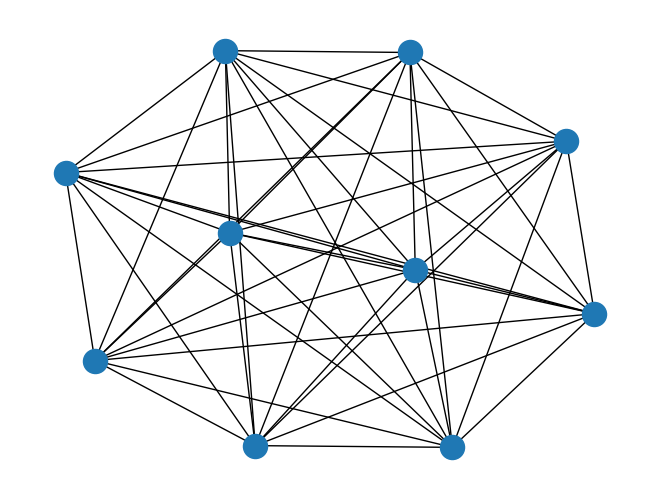

In [17]:
G = nx.complete_graph(authors)
nx.draw(G)